In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
#pip install pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

*Importando bases de dados e transformando em somente um dataframe*

In [3]:
summer_data = pd.read_csv('/Users/Clarice Nascimento/1. data_analytics/Athletes_summer_games.csv')
winter_data = pd.read_csv('/Users/Clarice Nascimento/1. data_analytics/Athletes_winter_games.csv')
summer_data

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237668,15116,ZWOLINSKA Klaudia,F,22.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Canoe Slalom,Women's Kayak,NaN
237669,15117,ZYKOVA Yulia,F,25.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Shooting,50m Rifle 3 Positions Women,Silver
237670,15118,ZYUZINA Ekaterina,F,24.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Sailing,Women's One Person Dinghy - Laser Radial,NaN
237671,15119,ZYZANSKA Sylwia,F,24.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Archery,Women's Individual,NaN


In [4]:
#Unindo as informações em um unico dataset e excluindo a coluna de "unnamed" poisnão representa de fato um index e há valores repetidos
games_data = pd.concat([summer_data,winter_data], axis = 0)
games_data = games_data.drop('Unnamed: 0', axis = 1)
games_data

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
48559,Andrzej ya,M,29.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
48560,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
48561,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
48562,Tomasz Ireneusz ya,M,30.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Informações Gerais da base de dados

In [5]:
#Verificando valores nulos e tipos de dados
print(games_data.info())
print(games_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 286237 entries, 0 to 48563
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    286237 non-null  object 
 1   Sex     286237 non-null  object 
 2   Age     276763 non-null  float64
 3   Team    286237 non-null  object 
 4   NOC     286237 non-null  object 
 5   Games   286237 non-null  object 
 6   Year    286237 non-null  int64  
 7   Season  286237 non-null  object 
 8   City    286237 non-null  object 
 9   Sport   286237 non-null  object 
 10  Event   286237 non-null  object 
 11  Medal   42232 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 28.4+ MB
None
Name           0
Sex            0
Age         9474
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     244005
dtype: int64


In [6]:
# Contar as ocorrências de cada valor na coluna 'age'
age_counts = games_data.groupby('Year')['Age'].count()
year_counts = games_data.groupby('Year')['Year'].count()

# Dividir as contagens pelo número total de registros de cada ano
proporcoes = ((age_counts / year_counts) *100).round(0)
proporcoes = proporcoes.reset_index(name='percent')
proporcoes

,Year,percent
0,1896,57.0
1,1900,59.0
2,1904,79.0
3,1906,57.0
4,1908,79.0
5,1912,96.0
6,1920,80.0
7,1924,80.0
8,1928,83.0
9,1932,90.0


Text(0.5, 0, 'Olympics Year')

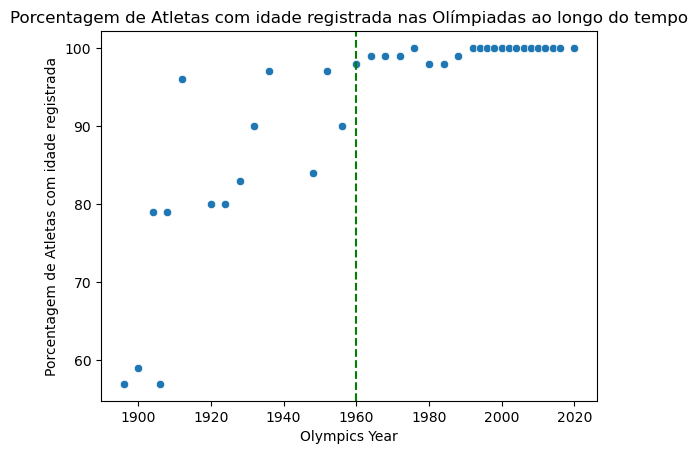

In [7]:
#Criando grafico de dispersão
ax = sns.scatterplot(data=proporcoes, x='Year', y='percent')
plt.axvline(1960, color='green', linestyle='--')

plt.title('Porcentagem de Atletas com idade registrada nas Olímpiadas ao longo do tempo')
plt.ylabel('Porcentagem de Atletas com idade registrada')
plt.xlabel('Olympics Year')

* A maioria das colunas não tem valores nulos;
* Idade tem 9.474 valores nulos (3,3% sobre o total de registros) - Jogos mais antigos tendiam a inserir menos idades de jogadores. Jogos de 1960 em diante tiveram 97,6% das idades inseridas ou mais, com todos os jogos começando em 1992 tendo 100%;
* Em Medalhas temos 244.005 valores nulos (85,2%) - isso é esperado porque nem todos podem ganhar

## Quantos atletas tinha por temporada de jogos?

In [8]:
#Quantidade de Atletas por ano e temporada de jogos
athletes_counts = games_data.groupby(['Year','Season'])['Name'].count()
athletes_counts = athletes_counts.reset_index(name='Atletas')
athletes_counts

,Year,Season,Atletas
0,1896,Summer,380
1,1900,Summer,1936
2,1904,Summer,1301
3,1906,Summer,1733
4,1908,Summer,3101
5,1912,Summer,4040
6,1920,Summer,4292
7,1924,Summer,5233
8,1924,Winter,460
9,1928,Summer,4992


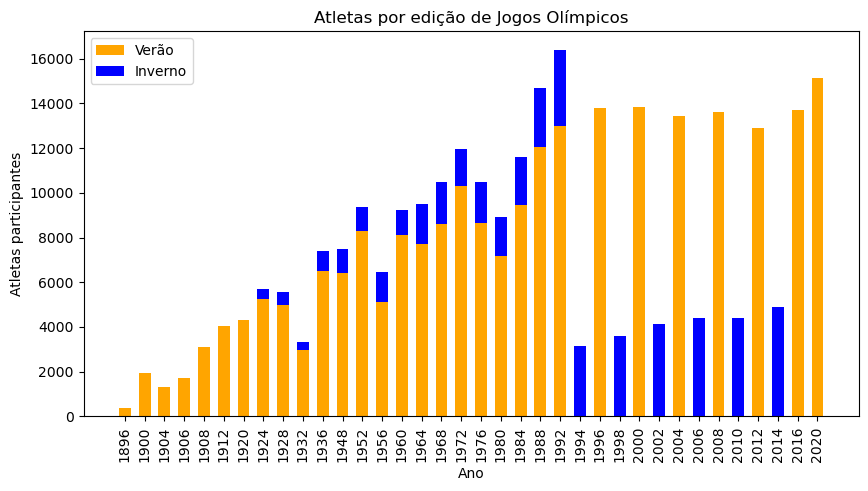

In [9]:
#Configurando dados para uso no gráfico
years = sorted(athletes_counts['Year'].unique()) 
season_summer = athletes_counts[athletes_counts['Season'] == 'Summer'].groupby('Year')['Atletas'].sum()
season_winter = athletes_counts[athletes_counts['Season'] == 'Winter'].groupby('Year')['Atletas'].sum()

#Garantindo que os anos estão presentes em ambas as séries temporais
season_summer = season_summer.reindex(years, fill_value=0)
season_winter = season_winter.reindex(years, fill_value=0)

#Definindo a largura das barras
bar_width = 0.6  # Ajuste para melhor visualização

#Criando o gráfico de barras empilhadas
plt.figure(figsize=(10, 5))
index = np.arange(len(years))

#Plotando a primeira série (Verão)
plt.bar(index, season_summer, bar_width, label='Verão', color='orange')

# Plotando a segunda série (Inverno) empilhada em cima da primeira
plt.bar(index, season_winter, bar_width, bottom=season_summer, label='Inverno', color='blue')

plt.xlabel('Ano')
plt.ylabel('Atletas participantes')
plt.title('Atletas por edição de Jogos Olímpicos')
plt.xticks(index, years,rotation=90)
plt.legend()

plt.show()

## Qual a distribuição de atletas por idade, sexo e temporada?

In [10]:
#Contagem de atletas por idade, sexo e temporada
athletes_count = (games_data
                           .groupby(['Age', 'Sex', 'Season'])['Name']
                           .nunique()
                           .reset_index(name='Atletas'))
athletes_count 

,Age,Sex,Season,Atletas
0,10.0,M,Summer,1
1,11.0,F,Summer,2
2,11.0,F,Winter,7
3,11.0,M,Summer,1
4,12.0,F,Summer,18
...,...,...,...,...
214,81.0,M,Summer,2
215,84.0,M,Summer,1
216,88.0,M,Summer,1
217,96.0,M,Summer,1


In [11]:
#Contagem de quantidade de atletas por edição de jogos e sexo
query = """
SELECT 
    Year,
    Sex,
    COUNT (DISTINCT(Name)) As Num_Atletas
FROM 
    games_data
GROUP BY
    Sex, 
    Year
ORDER BY
    Year DESC;
"""

athletes_by_year = pysqldf(query)
athletes_by_year

,Year,Sex,Num_Atletas
0,2020,F,5556
1,2020,M,6074
2,2016,F,5031
3,2016,M,6143
4,2014,F,1102
...,...,...,...
66,1904,F,6
67,1904,M,644
68,1900,F,23
69,1900,M,1197


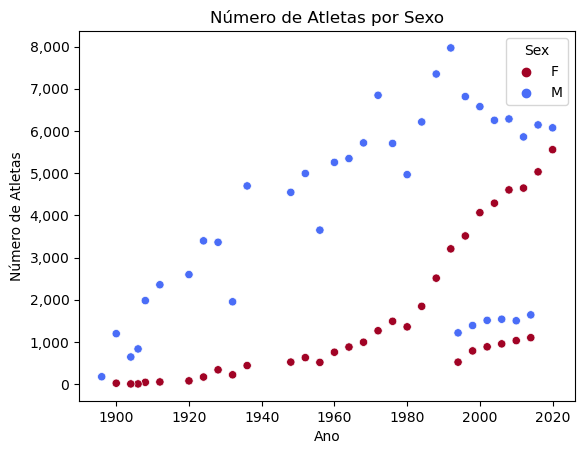

In [12]:
#Criando gráfico de dispersão
sex_palette = sns.color_palette(['#a10325', '#4a6df7']) # F has 98% saturation/63% value -- M has 70%/97%
ax = sns.scatterplot(data=athletes_by_year, x='Year', y='Num_Atletas', hue='Sex', palette=sex_palette)

plt.title('Número de Atletas por Sexo')
plt.ylabel('Número de Atletas')
plt.xlabel('Ano')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

Entre 1924 e 1992 os jogos foram nos mesmos anos (sendo agrupados neste gráfico).
A partir de 1994, os jogos de Inverno foram realizados em anos diferentes.
A participação de atletas femininas está aumentando em uma taxa um tanto quanto exponencial, enquanto a participação masculina apresenta variações com valores decrescentes em relação ao século anterior.
O número de atletas femininas no Verão quase alcançou o número de atletas masculinos.

## Quantos atletas competiram em cada número de Olímpiadas?

In [13]:
query = """
WITH table1 AS (
    SELECT 
        Name, 
        COUNT (DISTINCT(Games)) AS Num_Games
    FROM 
        games_data
    GROUP BY
        Name
    ORDER BY
        Num_Games DESC
)

SELECT
    Num_Games,
    COUNT(*) AS Num_Athletes
FROM
    table1
GROUP BY
    Num_Games
ORDER BY
    Num_Games ASC;
"""

atletas_por_num_jogos = pysqldf(query)
atletas_por_num_jogos

,Num_Games,Num_Athletes
0,1,108946
1,2,26280
2,3,8142
3,4,2221
4,5,584
5,6,143
6,7,32
7,8,10
8,9,2
9,10,1


C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


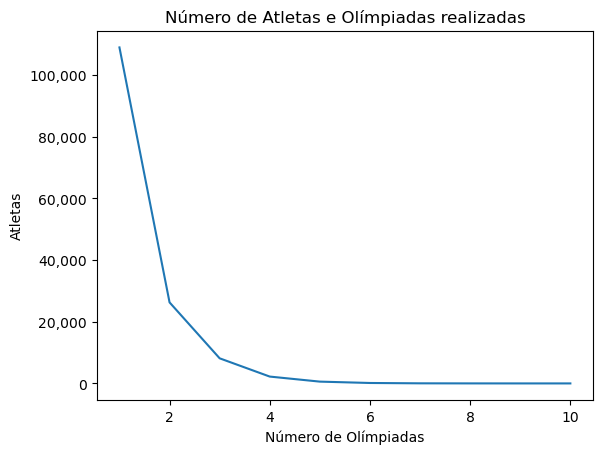

In [14]:
#Gráfico de linha
ax = sns.lineplot(data=atletas_por_num_jogos, x='Num_Games', y='Num_Athletes')

plt.title('Número de Atletas e Olímpiadas realizadas')
plt.ylabel('Atletas')
plt.xlabel('Número de Olímpiadas')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

A grande maioria dos atletas participou apenas de um único evento. Isso sugere que a maioria dos atletas não compete em múltiplos jogos ao longo de suas carreiras.
Apenas um pequeno número de atletas conseguiu competir em 5 ou mais jogos. Apenas 1 atleta chegou a participar de 10 jogos. Isso destaca um grupo muito seleto de atletas de elite que conseguem manter suas carreiras em um nível competitivo durante um período longo.

## Como é o comportamento de idade dos atletas e como a idade é distribuída?

In [15]:
query = """
SELECT 
    Year,
    MIN(Age) AS Menor_Idade,
    MAX(Age) AS Maior_Idade,    
    MAX(Age)-MIN(Age) AS Idade_Range
FROM 
    games_data
GROUP BY
    Year;
"""

age_range = pysqldf(query)
age_range 

,Year,Menor_Idade,Maior_Idade,Idade_Range
0,1896,10.0,40.0,30.0
1,1900,13.0,71.0,58.0
2,1904,14.0,71.0,57.0
3,1906,13.0,54.0,41.0
4,1908,14.0,61.0,47.0
5,1912,13.0,67.0,54.0
6,1920,13.0,72.0,59.0
7,1924,11.0,81.0,70.0
8,1928,11.0,97.0,86.0
9,1932,11.0,96.0,85.0


C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

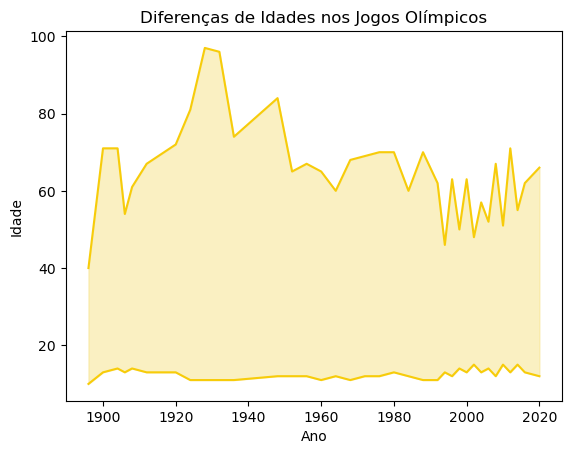

In [16]:
#Criando grafico de linhas com área preenchida
ax = sns.lineplot(data=age_range, x='Year', y='Menor_Idade', color='#f7cc0a')
sns.lineplot(data=age_range, x='Year', y='Maior_Idade', color='#f7cc0a')
ax.fill_between(age_range['Year'], age_range['Menor_Idade'], age_range['Maior_Idade'], color='#f7e286', alpha=0.5)

plt.title('Diferenças de Idades nos Jogos Olímpicos')
plt.ylabel('Idade')
plt.xlabel('Ano')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

In [17]:
#Média de idade dos atletas por ano de edição e sexo
query = """
SELECT 
    Sex,
    Year,
    AVG(Age) AS Média_Idade
FROM 
    games_data
GROUP BY 
    Sex,
    Year;
"""

idade_media = pysqldf(query)
idade_media

,Sex,Year,Média_Idade
0,F,1900,29.791667
1,F,1904,50.230769
2,F,1906,23.500000
3,F,1908,33.897436
4,F,1912,22.379310
...,...,...,...
66,M,2010,26.719765
67,M,2012,26.615904
68,M,2014,26.447699
69,M,2016,26.737307


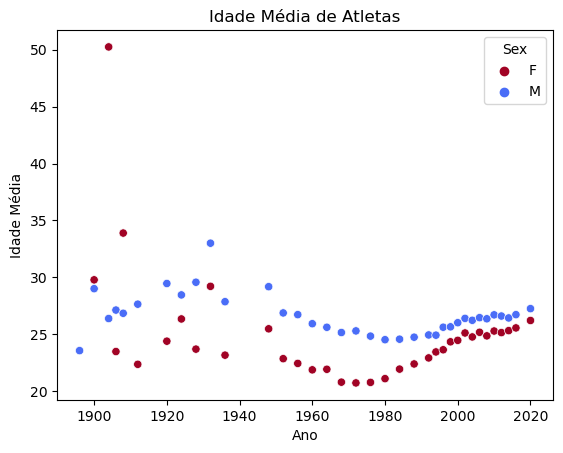

In [18]:
#Criando gráfico de dispersão
sex_palette = sns.color_palette(['#a10325', '#4a6df7']) # F has 98% saturation/63% value -- M has 70%/97%
ax = sns.scatterplot(data=idade_media, x='Year', y='Média_Idade', hue='Sex', palette=sex_palette)

plt.title('Idade Média de Atletas')
plt.ylabel('Idade Média')
plt.xlabel('Ano')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

In [19]:
#Quantidade de atletas por ano e temporada de edições
query = """
SELECT 
    Age,
    Season,
    COUNT (DISTINCT(Name)) As Num_Atletas
FROM 
    games_data
GROUP BY
    Age,
    Season
ORDER BY
    Num_Atletas DESC;
"""

atletas_by_age = pysqldf(query)
atletas_by_age

,Age,Season,Num_Atletas
0,23.0,Summer,13731
1,24.0,Summer,13525
2,22.0,Summer,12952
3,25.0,Summer,12845
4,26.0,Summer,11754
...,...,...,...
118,80.0,Summer,1
119,84.0,Summer,1
120,88.0,Summer,1
121,96.0,Summer,1


C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


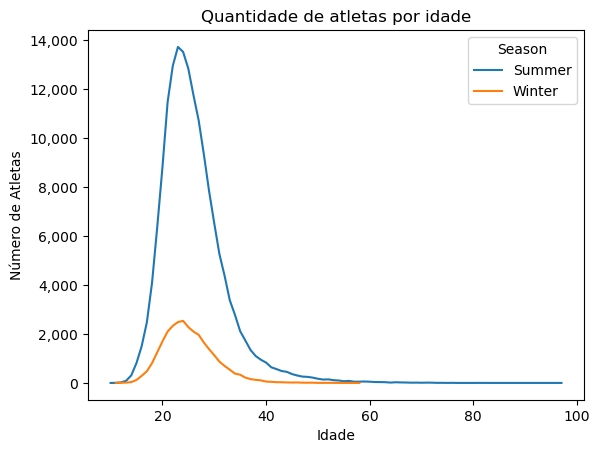

In [20]:
#Gráfico de linhas
ax = sns.lineplot(data=atletas_by_age, x='Age', y='Num_Atletas',hue='Season')

plt.title('Quantidade de atletas por idade')
plt.ylabel('Número de Atletas')
plt.xlabel('Idade')
plt.legend(title='Season')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

Em 1928 tivemos o participante mais velho de competições de Olímpiadas, com 97 anos e em 1896 o mais novo, com 10 anos de idade. A partir dos anos 2000, vemos uma aproximação entre a média de idade de mulheres e homens nas edições de jogos, estando entre 25 e 28 anos. entre as edições, a maior quantidade de participantes estava sobre a faixa etária de 23 a 25 anos. Diversos fatorem podem explicar as mudanças no comportamento de idades dos participantes de Olímpiadas, principalmente a evolução da preparação física, onde métodos modernos de treinamento e avanços na ciência do esporte permitem que os atletas atinjam o pico de desempenho mais cedo.

## Quantos novos países competiram em cada ano das Olímpiadas de Verão?

In [21]:
#Quantidade de países competindo por ano
query = """
SELECT 
    Year,
    COUNT (distinct(Team)) as Países
FROM 
    games_data
GROUP BY
    Year;
"""

países_por_ano = pysqldf(query)
países_por_ano

,Year,Países
0,1896,18
1,1900,190
2,1904,79
3,1906,52
4,1908,73
5,1912,102
6,1920,72
7,1924,93
8,1928,85
9,1932,72


In [22]:
#Quantidade de países novos competindo por ano
query = """
WITH table1 AS (
    SELECT 
        Team, 
        MIN(Year) AS primeiro_ano
    FROM 
        games_data
    WHERE 
        Season in ('Summer')
    GROUP BY
        Team
    ORDER BY
        primeiro_ano DESC
)

SELECT
    primeiro_ano,
    COUNT(*) AS num_paises
FROM
    table1
GROUP BY
    primeiro_ano
ORDER BY
    num_paises DESC;
"""
paises_by_primeiro_ano = pysqldf(query)
paises_by_primeiro_ano

,primeiro_ano,num_paises
0,1900,178
1,1960,103
2,1964,83
3,1912,68
4,1952,66
5,1904,65
6,1948,60
7,1936,60
8,1956,58
9,1908,46


Desde a decada de 1990, a quantidade de países participando de Olímpiadas apreseta tendencia de crescimento. Havia mais equipes competindo pela primeira vez em 1900 e 1960. Entre as edições de 1924 e 1932, além dos anos de 1976 e 1980, observamos pouca participação nos jogos, muito por conta de cenários políticos (Segunda Guerra e Guerra Fria) que impactaram diremente na participação significativa dos atletas. 

## Há alguma Olímpiadas faltando neste conjunto de dados?

In [23]:
query = """
SELECT
    Year,
    Games
FROM
    games_data
GROUP BY
    Year, 
    Games
ORDER BY
    Year ASC;
"""

ano_evento = pysqldf(query)
ano_evento

,Year,Games
0,1896,1896 Summer
1,1900,1900 Summer
2,1904,1904 Summer
3,1906,1906 Summer
4,1908,1908 Summer
5,1912,1912 Summer
6,1920,1920 Summer
7,1924,1924 Summer
8,1924,1924 Winter
9,1928,1928 Summer


De acordo com o site oficial dao Jogos Olímpicos, nesta base de dados estariam faltando somente as últimas duas edições dos jogos de inverno.
No conjunto de dados consta os jogos de 1906, porém não receberam o título de Olímpiadas porque foram realizados entre a III e a IV Olímpiadas.
Os jogos de verão de 1916 foram cancelados devido à Primeira Guerra Mundial e os jogos de inverno/verão de 1940/1944 foram todos cancelados devido à Segunda Guerra Mundial.

## Quantas vezes as cidades realizaram as Olímpiadas? Alguma cidade recebeu edições de inverno e verão?

In [24]:
#Contagem de quantas vezes cada cidade sediou os jogos
city_counts = games_data.groupby('City')['Games'].nunique().reset_index()
city_counts = city_counts.sort_values(by='Games', ascending=False)
city_counts

,City,Games
3,Athina,3
17,London,3
30,Sankt Moritz,2
26,Paris,2
39,Tokyo,2
37,Stockholm,2
18,Los Angeles,2
15,Lake Placid,2
14,Innsbruck,2
0,Albertville,1


In [25]:
# Verificação de quais cidades sediaram Jogos de Verão e Inverno
cidades_summer = set(games_data[games_data['Season'] == 'Summer']['City'])
cidades_winter = set(games_data[games_data['Season'] == 'Winter']['City'])

# Encontro de cidades que sediaram ambas as temporadas
cidades_intersection = cidades_summer.intersection(cidades_winter)
cidades_intersection

set()

In [26]:
#Tabela com consolidado de cidade, quantidade de vezes que sediou ou jogos, ultima edição realizada e quando realizou os primeiros jogos
query = """
SELECT
    City,
    COUNT (DISTINCT(Games)) AS Sede_de_Jogos,
    MAX(Year) AS Jogos_Mais_Recentes,
    MIN(Year) AS Primeiros_Jogos
FROM
    games_data
GROUP BY
    City
ORDER BY
    Jogos_Mais_Recentes DESC;
"""

historico_cidades = pysqldf(query)
historico_cidades

,City,Sede_de_Jogos,Jogos_Mais_Recentes,Primeiros_Jogos
0,Tokyo,2,2020,1964
1,Rio de Janeiro,1,2016,2016
2,Sochi,1,2014,2014
3,London,3,2012,1908
4,Vancouver,1,2010,2010
5,Beijing,1,2008,2008
6,Torino,1,2006,2006
7,Athina,3,2004,1896
8,Salt Lake City,1,2002,2002
9,Sydney,1,2000,2000


Atenas e Londes são as cidades que mais sediaram edições dos Jogos Olímpicos e nenhuma cidade que já tenha recebido alguma edição dos jogos de verão, sediou jogos de inverno. 

## Quantos esportes foram realizados em cada edição de cada temporada de Jogos Olímpicos?

In [27]:
#Contadem dos número de esportes distintos por edição de Jogos Olímpicos (por ano e estação)
sports_count = games_data.groupby(['Year', 'Season'])['Event'].nunique().reset_index()
sports_count = sports_count.sort_values(by='Event', ascending=False)
sports_count

,Year,Season,Event
51,2020,Summer,306
50,2016,Summer,306
48,2012,Summer,302
46,2008,Summer,302
44,2004,Summer,301
42,2000,Summer,300
40,1996,Summer,271
37,1992,Summer,257
35,1988,Summer,237
33,1984,Summer,221


In [28]:
#Quantidade de esportes novos por ano de edição
query = """
WITH table1 AS (
    SELECT 
        Sport,
        Season,
        MIN(Year) AS Primeiro_Ano
    FROM 
        games_data
    GROUP BY
        Sport, 
        Season
    ORDER BY
        Primeiro_Ano DESC
)

SELECT
    Primeiro_Ano,
    Season,
    COUNT(*) AS Num_Sports
FROM
    table1
GROUP BY
    Primeiro_Ano, 
    Season
ORDER BY
    Primeiro_Ano DESC;
"""

sports_primeiro_ano = pysqldf(query)
sports_primeiro_ano

,Primeiro_Ano,Season,Num_Sports
0,2020,Summer,18
1,2016,Summer,1
2,2000,Summer,3
3,1998,Winter,1
4,1996,Summer,2
5,1992,Summer,2
6,1992,Winter,2
7,1988,Summer,1
8,1984,Summer,2
9,1964,Summer,2


C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Clarice Nascimento\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


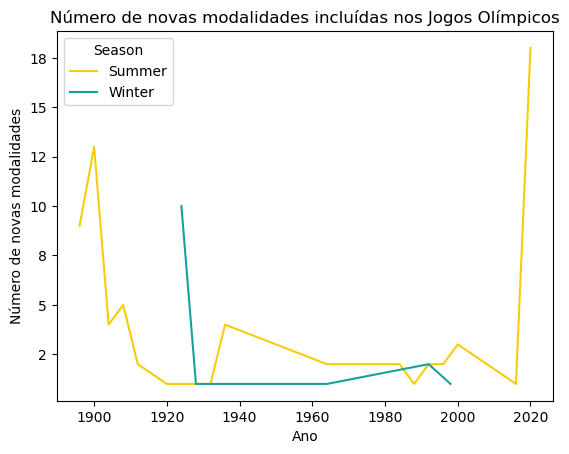

In [29]:
#Gráfico de linhas
season_palette = sns.color_palette(['#f7cc0a', '#15a19e'])
ax = sns.lineplot(data=sports_primeiro_ano, x='Primeiro_Ano', y='Num_Sports', hue='Season', palette=season_palette)

plt.title('Número de novas modalidades incluídas nos Jogos Olímpicos')
plt.ylabel('Número de novas modalidades')
plt.xlabel('Ano')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

A quantidade de modalidades olímpicas de verão aumentou 13% em relação ao final do milêncio passado, assim como em edições de inverno, que aumentram 44%. As Olímpiadas de verão tem menos modalidades novas introduzidas ao longo do tempo - com uma exceção em 2020, com 18 novas modalidades ingressando nessa edição. Na temprada de inverno temos mais modalidades introduzidas ao longo do tempo.